### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Support Vector Machines

## 1. Getting the data

In [2]:
# reading data
data = pd.read_csv('data.csv')
data

,Mean Grade,Weekly Study Hours,Approved
0,5.69,0.39,0
1,5.19,4.21,0
2,4.36,0.64,0
3,6.58,2.06,0
4,1.77,6.74,0
...,...,...,...
95,5.93,8.09,1
96,5.96,8.54,1
97,5.64,6.32,1
98,9.12,7.64,1


<AxesSubplot:xlabel='Mean Grade', ylabel='Weekly Study Hours'>

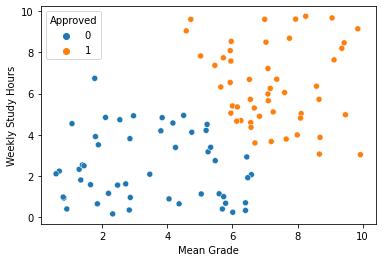

In [3]:
sns.scatterplot(data=data, x='Mean Grade', y='Weekly Study Hours', hue='Approved')

In [4]:
# Getting the feature matrix and classes
y = data['Approved'].values
X = data.drop(columns='Approved').values

In [5]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [6]:
print(f'Train: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')
print(f'Test: X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')

Train: X_train.shape = (80, 2), y_train.shape = (80,)
Test: X_test.shape = (20, 2), y_test.shape = (20,)


## 2. Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

<AxesSubplot:xlabel='Mean Grade', ylabel='Weekly Study Hours'>

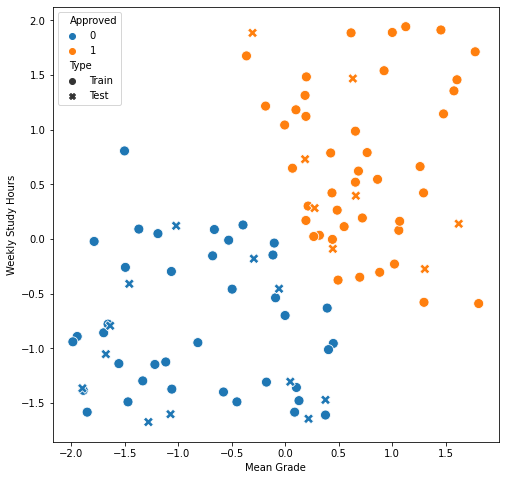

In [9]:
df = pd.DataFrame({
    'Mean Grade': list(X_train_norm[:,0]) + list(X_test_norm[:,0]),
    'Weekly Study Hours': list(X_train_norm[:,1]) + list(X_test_norm[:,1]),
    'Approved': list(y_train) + list(y_test),
    'Type': ['Train'] * y_train.size + ['Test'] * y_test.size
})

plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Mean Grade', y='Weekly Study Hours', hue='Approved', style='Type', s=100)

## 3. Linear SVM

In [12]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [13]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax, ax=None):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    if ax:
        ax.plot(x0, decision_boundary, "k-", linewidth=2)
        ax.plot(x0, gutter_up, "k--", linewidth=2)
        ax.plot(x0, gutter_down, "k--", linewidth=2)
    else:
        plt.plot(x0, decision_boundary, "k-", linewidth=2)
        plt.plot(x0, gutter_up, "k--", linewidth=2)
        plt.plot(x0, gutter_down, "k--", linewidth=2)

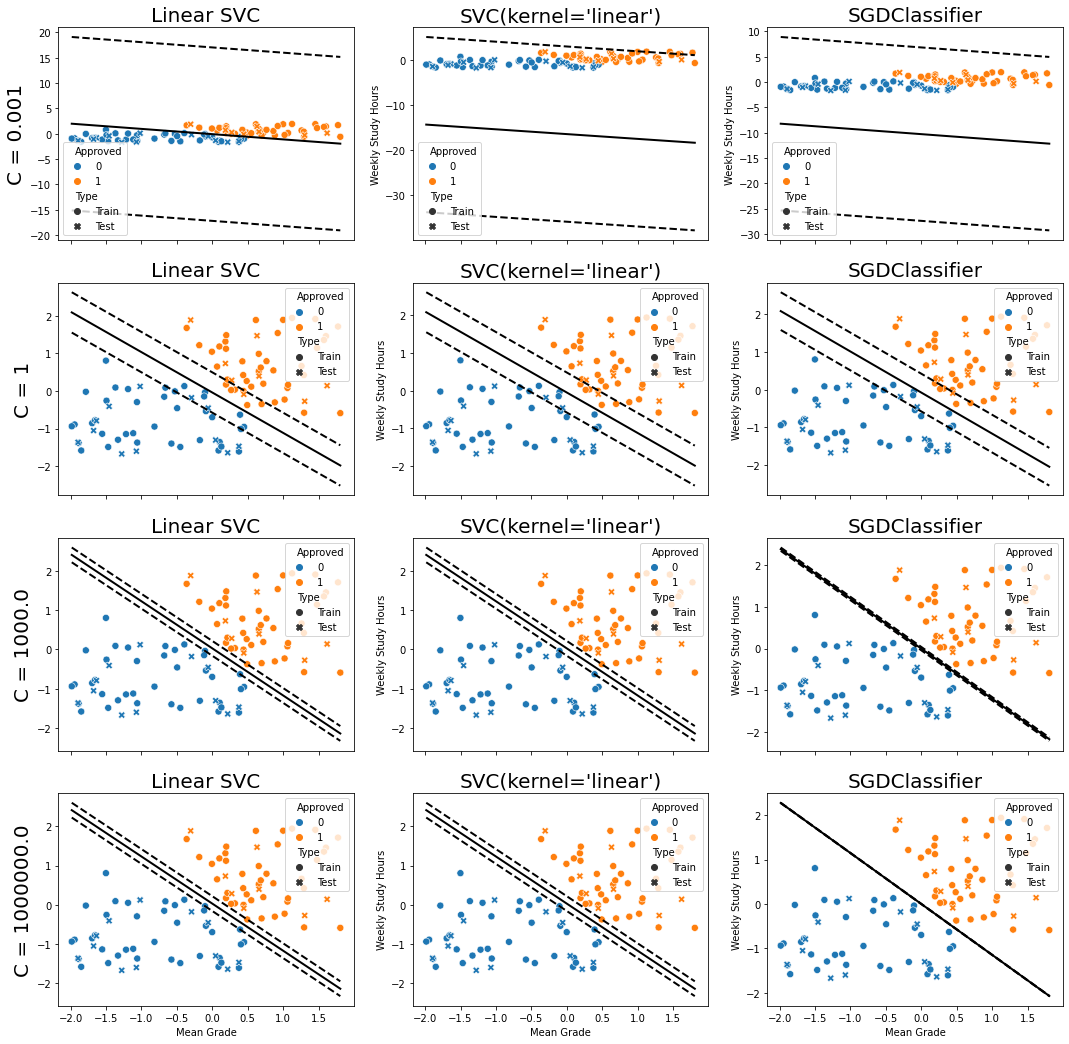

In [14]:
# plotting

C = [1e-3, 1, 1e3, 1e6]  # possible hyperparameter C
m = X_train_norm.shape[0]  # number of training samples
xmin = X_train_norm[:,0].min()
xmax = X_train_norm[:,0].max()

fig, axes = plt.subplots(4, 3, sharex=True, figsize=(18, 18))

for i in range(4):
    # LinearSVC
    linear_svc_clf = LinearSVC(C=C[i], loss='hinge')
    linear_svc_clf.fit(X_train_norm, y_train)
    # sns.scatterplot(x=X_norm[:,0], y=X_norm[:,1], hue=y, ax=axes[i,0])
    sns.scatterplot(data=df, x='Mean Grade', y='Weekly Study Hours', hue='Approved', style='Type', s=50, ax=axes[i,0])
    plot_svc_decision_boundary(linear_svc_clf, xmin, xmax, ax=axes[i,0])
    axes[i,0].set_title(f'Linear SVC', fontsize=20)
    axes[i,0].set_ylabel(f'C = {C[i]}', fontsize=20)
    
    # SVC
    svc_clf = SVC(kernel='linear', C=C[i])
    svc_clf.fit(X_train_norm, y_train)
    # sns.scatterplot(x=X_norm[:,0], y=X_norm[:,1], hue=y, ax=axes[i,1])
    sns.scatterplot(data=df, x='Mean Grade', y='Weekly Study Hours', hue='Approved', style='Type', s=50, ax=axes[i,1])
    plot_svc_decision_boundary(svc_clf, xmin, xmax, ax=axes[i,1])
    axes[i,1].set_title(f"SVC(kernel='linear')", fontsize=20)
    
    # SVC
    sgd_clf = SGDClassifier(loss='hinge', alpha= 1/(m * C[i]))
    sgd_clf.fit(X_train_norm, y_train)
    # sns.scatterplot(x=X_norm[:,0], y=X_norm[:,1], hue=y, ax=axes[i,2])
    sns.scatterplot(data=df, x='Mean Grade', y='Weekly Study Hours', hue='Approved', style='Type', s=50, ax=axes[i,2])
    plot_svc_decision_boundary(sgd_clf, xmin, xmax, ax=axes[i,2])
    axes[i,2].set_title(f"SGDClassifier", fontsize=20)
    
    